In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
LiH = pd.read_csv('LiH.csv')
NaH = pd.read_csv('NaH.csv')
KH  = pd.read_csv('KH.csv')
CsH = pd.read_csv('CsH.csv')

LiH['without_dis'] = LiH['energy']-LiH['E-dispersion']
NaH['without_dis'] = NaH['energy']-NaH['E-dispersion']
KH['without_dis'] = KH['energy']-KH['E-dispersion']
CsH['without_dis'] = CsH['energy']-CsH['E-dispersion']

LiH.head()

,cell_length,energy,E-dispersion,without_dis
0,3.517239,-23.458076,-1.32277,-22.135306
1,3.617239,-24.019365,-1.20817,-22.811195
2,3.717239,-24.413684,-1.10521,-23.308474
3,3.817239,-24.666217,-1.01151,-23.654707
4,3.917239,-24.806442,-0.92519,-23.881252


In [166]:
def plotG(df):
    plt.plot(df['cell_length'], df['energy'], label='Total Energy')
    plt.plot(df['cell_length'], df['without_dis'], label='Energy without dispersion')
    plt.xlabel('Cell Length')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()

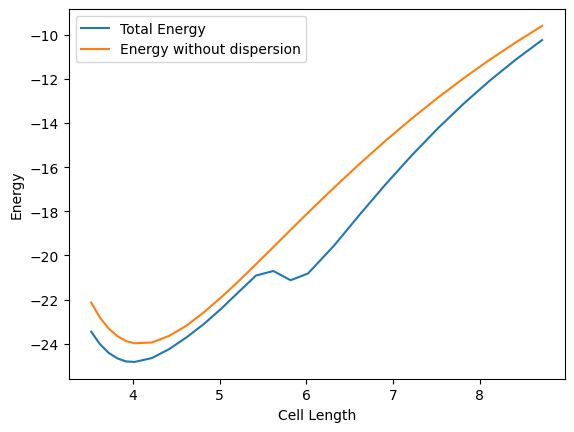

In [169]:
plotG(LiH)
# plotG(NaH)
# plotG(KH)

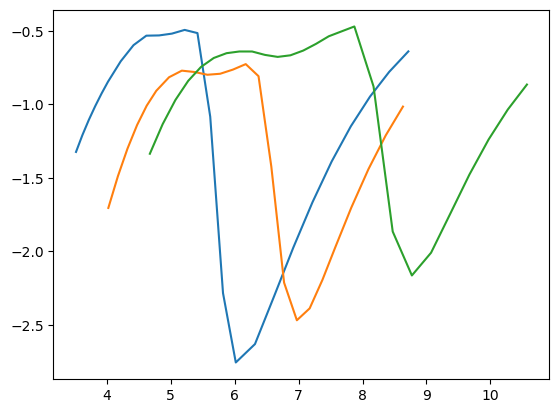

In [176]:
# plt.plot(LiH['cell_length'],LiH['without_dis'])
# plt.plot(LiH['cell_length'],LiH['energy'])
plt.plot(LiH['cell_length'],LiH['E-dispersion'])
plt.plot(NaH['cell_length'],NaH['E-dispersion'])
plt.plot(KH['cell_length'],KH['E-dispersion'])
plt.show()
# plt.plot(CsH['cell_length'],CsH['E-dispersion'])

In [171]:
def findMinX(df):
    min_y_index = df["energy"].idxmin()
    min_x_value = df.loc[min_y_index, "cell_length"]
    
    # print(min_x_value,df['E-dispersion'][min_y_index])
    print(min_y_index)
    return df['E-dispersion'][min_y_index]

In [172]:
val_LiH = abs(min(LiH['E-dispersion']))
val_NaH = abs(min(NaH['E-dispersion']))
val_KH = abs(min(KH['E-dispersion']))
val_CsH = abs(min(CsH['E-dispersion']))

base_LiH = abs(findMinX(LiH))
base_NaH = abs(findMinX(NaH))
base_KH = abs(findMinX(KH))
base_CsH = abs(CsH['E-dispersion'][5])



print(val_LiH/base_LiH ,val_NaH/base_NaH,val_KH/base_KH)

5
5
5
3.2590139112330845 2.7208251105255616 3.1638754406236744


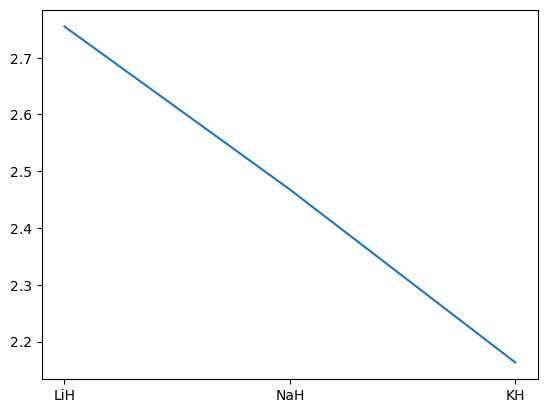

In [173]:
# without dividing by base value 
x = ['LiH','NaH','KH']
y = [val_LiH,val_NaH,val_KH]

plt.plot(x,y)
plt.show()

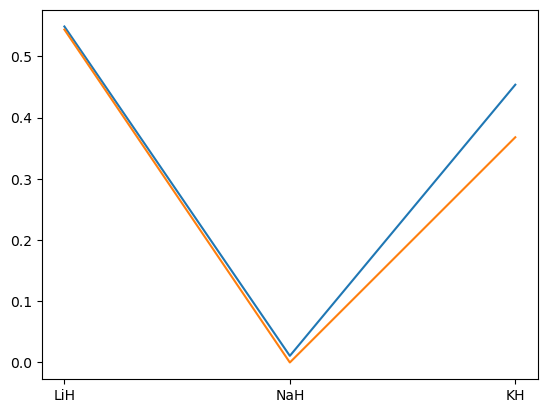

In [175]:
# dividing by base values 
x = ['LiH','NaH','KH']

y = np.array([val_LiH/base_LiH ,val_NaH/base_NaH,val_KH/base_KH])-2.71

fac = 1.6

y_redox = (np.array([3.05,2.71,2.94])-2.71)*fac
plt.plot(x,y,y_redox)
plt.show()

#### Significance of Standard Reduction Potential
Higher Magnitude means its more likely to release an electron so the Hydrogen willl have a higher negetive charge. This is not refected in the electronegetivity difference. 
